In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()
warnings.filterwarnings("ignore")

### Linear Regression

In [16]:
class LinearRegression:
    def __init__(self,lamda=0):
        self.lamda = lamda

    def __cost_gradient(self,X,j):
        m = X.shape[0]
        return np.sum(((X @ self.theta)-y.reshape(m,1))*np.expand_dims(X[:,j],-1),axis=0)/m + self.lamda/m * self.theta[j]
        
    def fit(self,X,y,alpha=0.001,epochs=100):
        m, n = X.shape[0], X.shape[1]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        self.theta = np.random.rand(n+1,1)
        gradients = np.zeros((n+1,1))
        for epoch in range(epochs):
            for j in range(n+1):
                gradients[j] = self.__cost_gradient(X,j)
            self.theta = self.theta- alpha * gradients
            yield X @ self.theta, self.theta
            
    def predict(self,X):
        m = X.shape[0]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        return X @ self.theta

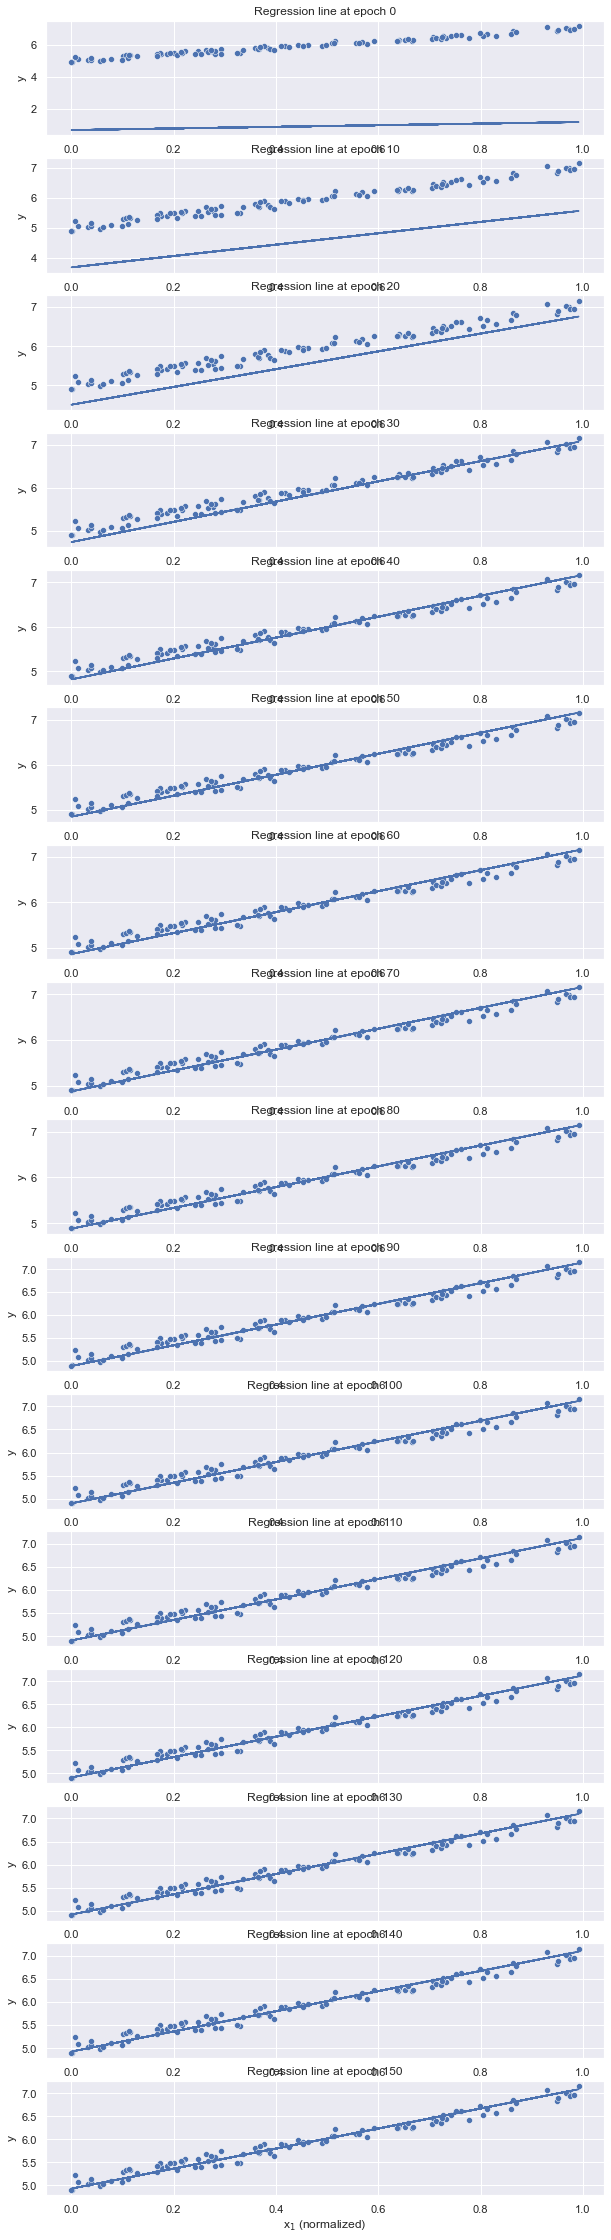

In [17]:
m = 100
n = 1
X = np.random.rand(m,n)
y = 2*X[:,0] + 5 + np.random.normal(0,0.1,m)
lr = LinearRegression()
mse = []
k = 0
i = 1
n_epochs = 151
plt.figure(figsize=(10,40))
for y_hat, theta in lr.fit(X,y,0.1,n_epochs):
    mse.append(np.sum((y_hat-y.reshape(m,1))**2,axis=0)/(2*m))
    if k % 10 == 0:
        plt.subplot(n_epochs//10+1,1,i)
        sns.scatterplot(X[:,0],y)
        plt.plot(X[:,0],y_hat)
        plt.title(f'Regression line at epoch {k}')
        plt.xlabel("x$_1$ (normalized)")
        plt.ylabel("y")
        i += 1
    k += 1

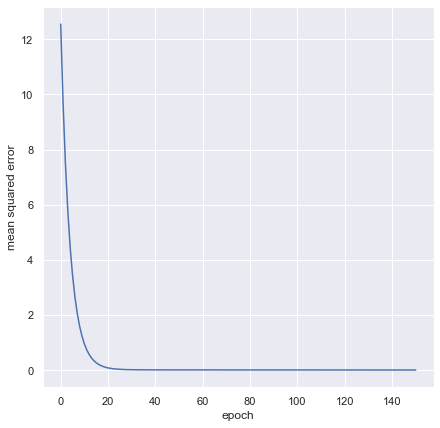

In [18]:
plt.figure(figsize=(7,7))
plt.plot(mse)
plt.xlabel("epoch")
plt.ylabel("mean squared error");

### Nearest Neighbor Regression

In [19]:
def euclidean_distance(p1,p2):
    return np.sum((p1-p2)**2)

class KNNRegression:
    def __init__(self,k=3):
        self.k = k

    def fit(self,X,y):
        self.points = list(zip(X,y))

    def predict(self,X):
        sorted_points = sorted(self.points,key=lambda p1: euclidean_distance(p1[0],X))
        k_closest_points = sorted_points[:self.k]
        return np.mean(k_closest_points,axis=0)[1], k_closest_points

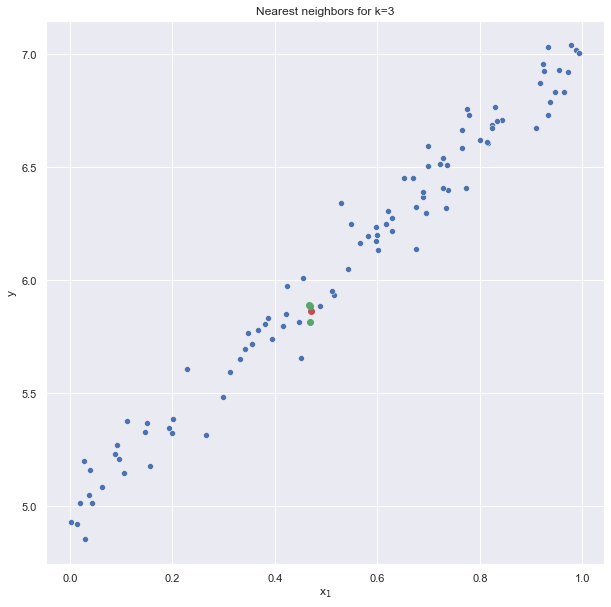

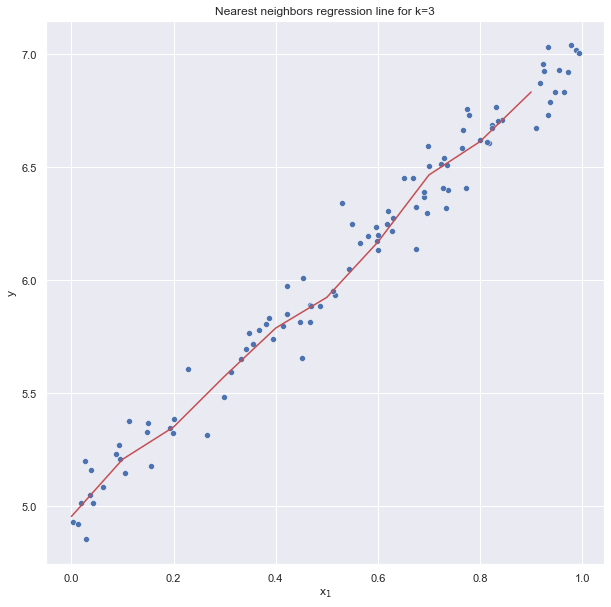

In [20]:
m = 100
n = 1
X = np.random.rand(m,n)
y = 2*X[:,0] + 5 + np.random.normal(0,0.1,m)
k = 3
knn = KNNRegression(k=k)
knn.fit(X,y)
x = np.random.rand(1,n)
y_pred, k_closest_points = knn.predict(x)
plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],y)
plt.plot(x,y_pred,'o',color='r')
for point in k_closest_points:
    plt.plot(point[0],point[1],'o',color='g')
plt.title(f'Nearest neighbors for k={k}')
plt.xlabel("x$_1$")
plt.ylabel("y");

y_sweep = []
x_sweep = np.arange(0,1,0.1)
for x in x_sweep:
    y_pred, k_closest_points = knn.predict(x)
    y_sweep.append(y_pred)
plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],y)
plt.plot(x_sweep,y_sweep,color='r')
plt.title(f'Nearest neighbors regression line for k={k}')
plt.xlabel("x$_1$")
plt.ylabel("y");

### Logistic Regression

In [21]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression:  
    def __init__(self,lamda=0):
        self.lamda = lamda

    def __cost_gradient(self,X,j):
        m = X.shape[0]
        return np.sum((sigmoid(X @ self.theta)-y.reshape(m,1))*np.expand_dims(X[:,j],-1),axis=0)/m + self.lamda/m * self.theta[j]
    
    def fit(self,X,y,alpha=0.001,epochs=100):
        m, n = X.shape[0], X.shape[1]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        if n_classes == 2:
            self.theta = np.random.rand(n+1,1)
            gradients = np.zeros((n+1,1))
            for epoch in range(epochs):
                for j in range(n+1):
                    gradients[j] = self.__cost_gradient(X,j)
                self.theta = self.theta - alpha * gradients
                yield X @ self.theta, self.theta
        else:
            self.theta = np.random.rand(n+1,n_classes)
            for k in range(n_classes):
                gradients = np.zeros(n+1)
                for epoch in range(epochs):
                    for j in range(n+1):
                        gradients[j] = self.__cost_gradient(X,j)
                    self.theta[:,k] = self.theta[:,k] - alpha * gradients
                    yield X @ self.theta, self.theta

    def predict(self,X):
        m = X.shape[0]
        X = np.concatenate([np.ones((m,1)),X],axis=1)
        if self.n_classes == 2:
            return sigmoid(X @ self.theta) >= 0.5
        return self.classes[np.argmax(sigmoid(X @ self.theta),axis=1)]

In [153]:
m = 200
n = 2
X = np.random.rand(m,n)
y = np.zeros(m)
for i in range(m):
    y[i] = np.random.binomial(1,sigmoid(5+2*X[i,0]-10*X[i,1]))
logreg = LogisticRegression()
cost = []
k = 0
i = 1
n_epochs = 701
plt.figure(figsize=(10,40))
for X_theta, theta in logreg.fit(X,y,0.8,n_epochs):
    cost.append(-np.sum((y.reshape(m,1)*np.log(sigmoid(X_theta))+(1-y.reshape(m,1))*np.log(1-sigmoid(X_theta))),axis=0)/m)
    if k % 100 == 0:
        plt.subplot(n_epochs//100+1,1,i)
        sns.scatterplot(X[:,0],X[:,1],hue=y,palette=['b','g'])
        decision_x = np.arange(0,1.1,0.1)
        decision_y = -(theta[0] + theta[1]*decision_x)/theta[2]
        plt.plot(decision_x,decision_y,color='r')
        plt.title(f'Decision boundary at epoch {k}')
        plt.xlabel("x$_1$")
        plt.ylabel("x$_2$")
        i += 1
    k += 1

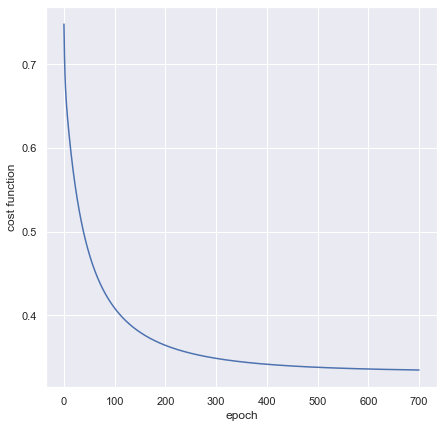

In [23]:
plt.figure(figsize=(7,7))
plt.plot(cost)
plt.xlabel("epoch")
plt.ylabel("cost function");

### Nearest Neighbor Classification

In [24]:
def euclidean_distance(p1,p2):
    return np.sum((p1-p2)**2)

class KNNClassification:
    def __init__(self,k=3):
        self.k = k

    def fit(self,X,y):
        self.points = list(zip(X,y))

    def predict(self,X):
        sorted_points = sorted(self.points,key=lambda p1: euclidean_distance(p1[0],X))
        k_closest_points = sorted_points[:self.k]
        counts = {}
        for point in k_closest_points:
            counts[point[1]] = counts[point[1]] + 1 if point[1] in counts else 0
        return max(counts,key=lambda label: counts[label]), k_closest_points

### Support Vector Machines

In [80]:
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False

def sign(x):
    x[x < 0] = -1
    x[x >= 0] = 1
    return x

class SVM:    
    def __init__(self,kernel='linear',d=2,C=100):
        self.kernel = kernel
        self.d = d
        self.C = C

    def __kernel(self,x,z):
        if(self.kernel=='linear'):
            K = np.inner(x,z)
        elif(self.kernel=='polynomial'):
            inner_prod = np.inner(x,z)
            K = 1
            for t in range(self.d-1):
                K += inner_prod
                inner_prod *= inner_prod
        return K

    def fit(self,X,y):
        m, n = X.shape[0], X.shape[1]
        y[y == 0] = -1
        P = np.zeros((m,m))
        for i in range(m):
            for j in range(m):
                P[i,j] = y[i]*y[j]*self.__kernel(X[i,:],X[j,:])
        P = matrix(P)
        q = matrix(-np.ones(m))
        A = matrix(y.reshape(1,m))
        G = matrix(np.concatenate([np.eye(m),-np.eye(m)],axis=0))
        h = matrix(np.concatenate([np.full(m,self.C),np.zeros(m)],axis=0))
        b = matrix(np.zeros(1))
        self.alpha = np.array(solvers.qp(P=P,q=q,G=G,h=h,A=A,b=b)['x'])
        self.w = np.sum(y.reshape(m,1)*X*self.alpha,axis=0).transpose()
        on_margin = np.logical_and(self.alpha[:,0] > 10e-4,self.alpha[:,0] < self.C)
        X_margin, y_margin = X[on_margin], y[on_margin]
        self.b = -(np.min((X_margin @ self.w)[y_margin == -1]) + np.max((X_margin @ self.w)[y_margin == 1]))/2
        self.x, self.y = X[self.alpha[:,0] > 10e-4], y[self.alpha[:,0] > 10e-4]
        self.alpha = self.alpha[self.alpha[:,0] > 10e-4]
        return X_margin, y_margin
        
    def predict(self,X):
        K = np.zeros((self.x.shape[0],X.shape[0]))
        for i in range(self.x.shape[0]):
            for j in range(X.shape[0]):
                K[i,j] = self.__kernel(self.x[i,:],X[j,:])
        return sign(np.sum(self.alpha*self.y*K,axis=0)+self.b)

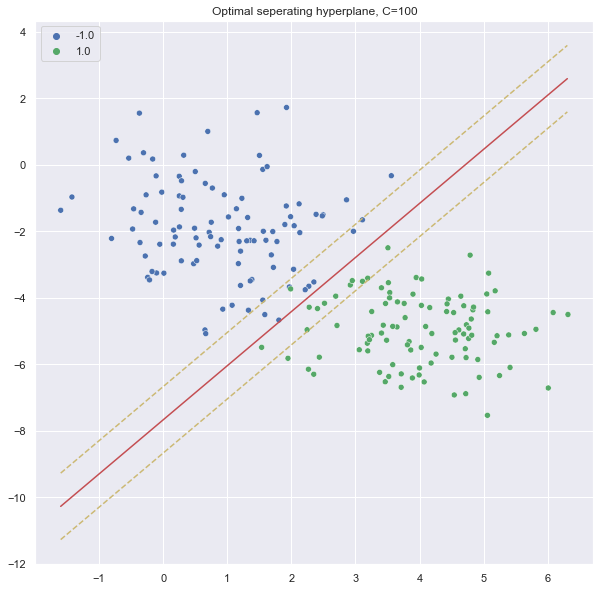

In [152]:
m = 200
n = 2
X1 = np.concatenate([np.random.normal(1,1,size=m//2),np.random.normal(4,1,size=m//2)],axis=0)
X2 = -np.concatenate([np.random.normal(2,1.5,size=m//2),np.random.normal(5,1,size=m//2)],axis=0)
X = np.concatenate([X1.reshape(m,1),X2.reshape(m,1)],axis=1)
y = np.ones(m)
y[:m//2] = -1
C = 100
svm = SVM(kernel='linear',C=C)
X_margin, y_margin = svm.fit(X,y)
plt.figure(figsize=(10,10))
sns.scatterplot(X[:,0],X[:,1],hue=y,palette=['b','g'])
hyperplane_x1 = np.arange(np.min(X[:,0]),np.max(X[:,0]),0.1)
hyperplane_x2 = -(svm.w[0]*hyperplane_x1+svm.b)/svm.w[1]
plt.plot(hyperplane_x1,hyperplane_x2,color='r')

margin1_x2 = hyperplane_x2 + 1
margin2_x2 = hyperplane_x2 - 1
plt.plot(hyperplane_x1,margin1_x2,'--',color='y',linewidth=1.5)
plt.plot(hyperplane_x1,margin2_x2,'--',color='y',linewidth=1.5)

plt.title(f'Optimal seperating hyperplane, C={C}');